In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Look at the shape of each DataFrame - how many rows? How many columns?

Take a look at the datatypes for the columns in each DataFrame.

Take a look at the last 10 rows of each DataFrame in turn.

In [41]:
gdp_df=pd.read_csv('data/gdp_percapita.csv')
#gdp_df.head(6)
#gdp_df.info()
gdp_df.shape
#print(gdp_df.dtypes)
#gdp_df.tail(10)

(6608, 4)

In [125]:
internet_df=pd.read_csv('data/internet_use.csv')
#internet_df.head(6)
#internet_df.info()
#internet_df.shape
internet_df.dtypes
#internet_df.tail(10)

Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object

Drop the value footnotes column from both DataFrames. Check that this worked as expected.

In [128]:
#gdp_df.drop(columns='Value Footnotes', inplace=True) 
    #Altnerative: gdp_df = gdp_df.drop('Value Footnotes', inplace=True)
#gdp_df.shape #the column still seems to be part of the dataframe and not actually deleted in the original .csv file
gdp_df.head(6)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,2190.240321
1,Afghanistan,2017,2202.570851
2,Afghanistan,2016,2200.764487
3,Afghanistan,2015,2212.750899
4,Afghanistan,2014,2249.253738
5,Afghanistan,2013,2264.317575


In [48]:
#internet_df.drop(columns='Value Footnotes', inplace=True)
#internet_df.shape
internet_df.head(6)

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
5,Afghanistan,2009,3.550000


Change the columns for the GDP Per Capita DataFrame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [60]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,2190.240321
1,Afghanistan,2017,2202.570851
2,Afghanistan,2016,2200.764487
3,Afghanistan,2015,2212.750899
4,Afghanistan,2014,2249.253738


Change the columns for the Internet Users DataFrame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [61]:
internet_df.columns = ['Country','Year','Internet_Users_Pct']
    #Alternative if you only want to rename a few columns out of many: internet_df.rename(columns = {'Country or Area':'Country', 'Year':'Year', 'Value': 'Internet_Users_Pct'}, inplace=True)
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use.

QUESTION 13

In [52]:
gdp_and_internet_use=gdp_df.merge(internet_df, on=["Country","Year"], how='outer')

In [126]:
#gdp_and_internet_use.head(10)
gdp_and_internet_use.tail(10)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7837,171,Internet Dial-up customers.,NaN,NaN
7838,172,Population age 16+ using the Internet in the l...,NaN,NaN
7839,173,Population age 16+ using internet in the last ...,NaN,NaN
7840,174,"U.S. Census Bureau, Table 2. Reported Internet...",NaN,NaN
7841,175,Includes individuals 3 years and older,NaN,NaN
7842,176,NTIA/CPS survey.,NaN,NaN
7843,177,"Pew Internet Project, Internet Broadband and c...",NaN,NaN
7844,178,Estimated based on Survey's results. Populatio...,NaN,NaN
7845,179,Preliminary. Country estimate.,NaN,NaN
7846,180,The methodology used to estimated the figure f...,NaN,NaN


Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [62]:
filtered_years=gdp_and_internet_use[(gdp_and_internet_use.Year == '2004') | (gdp_and_internet_use.Year == '2009') | (gdp_and_internet_use.Year == '2014')]

In [129]:
#filtered_years.head(10)
filtered_years.Year.value_counts()

2009    277
2014    277
2004    276
Name: Year, dtype: int64

Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [65]:
gdp_and_internet_use_04 = gdp_and_internet_use[gdp_and_internet_use.Year == '2004']
gdp_and_internet_use_09 = gdp_and_internet_use[gdp_and_internet_use.Year == '2009']
gdp_and_internet_use_14 = gd p_and_internet_use[gdp_and_internet_use.Year == '2014']

In [66]:
type(gdp_and_internet_use_04)

pandas.core.frame.DataFrame

In [59]:
print(gdp_and_internet_use_14)

                    Country  Year  GDP_Per_Capita  Internet_Users_Pct
4               Afghanistan  2014     2249.253738                6.39
21                  Albania  2014    11828.232264               60.10
50                  Algeria  2014    11329.428688               18.09
79                   Angola  2014     8239.832077               21.26
108     Antigua and Barbuda  2014    18104.241470               64.00
...                     ...   ...             ...                 ...
7522     T.F.Y.R. Macedonia  2014             NaN               68.06
7580              Venezuela  2014             NaN               57.00
7604               Viet Nam  2014             NaN               48.31
7624  Virgin Islands (U.S.)  2014             NaN               50.07
7646                  Yemen  2014             NaN               22.55

[277 rows x 4 columns]


QUESTION 18:

Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab key for auto-complete options).
Repeat for 2004 and 2009.

In [90]:
gdp_and_internet_use_14.sort_values('Internet_Users_Pct', ascending=False)
#gdp_and_internet_use_09.sort_values('Internet_Users_Pct', ascending=False)
#gdp_and_internet_use_04.sort_values('Internet_Users_Pct', ascending=False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2507,Iceland,2014,49911.069825,98.16
6651,Bermuda,2014,NaN,96.80
4461,Norway,2014,61308.763730,96.30
1374,Denmark,2014,52172.606425,95.99
6611,Andorra,2014,NaN,95.90
...,...,...,...,...
6179,Tuvalu,2014,3455.741510,NaN
6353,Upper middle income,2014,14271.692393,NaN
6469,Vietnam,2014,6098.489609,NaN
6498,West Bank and Gaza,2014,5499.415939,NaN


QUESTION 18 ANSWER:

2004: Sweden, 83.89 percent

2009: Iceland, 93 percent

2014: Iceland, 98.16 percent

QUESTION 19

Which country had the lowest percentage of internet users in 2014? What was the percentage?
Repeat for 2004 and 2009.

In [89]:
#gdp_and_internet_use_14.sort_values('Internet_Users_Pct', ascending=True)
#gdp_and_internet_use_09.sort_values('Internet_Users_Pct', ascending=True)
gdp_and_internet_use_04.sort_values('Internet_Users_Pct', ascending=True) 

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6849,Dem. People's Rep. of Korea,2004,NaN,0.000000
4166,Myanmar,2004,1696.881760,0.024337
3395,Liberia,2004,1181.546158,0.031011
5843,Tajikistan,2004,1737.743630,0.077480
14,Afghanistan,2004,1284.127338,0.105809
...,...,...,...,...
6189,Tuvalu,2004,3341.738017,NaN
6363,Upper middle income,2004,8561.878030,NaN
6479,Vietnam,2004,3689.732423,NaN
6508,West Bank and Gaza,2004,4113.246936,NaN


QUESTION 19 ANSWER:

    2014: Dem. People's Rep. of Korea, 0%
    2009: Dem. People's Rep. of Korea, 0%
    2004: Dem. People's Rep. of Korea, 0%
    

21. Which country had the highest gdp per capita in 2014? What was the gdp per capita?


In [73]:
gdp_and_internet_use_14.sort_values('GDP_Per_Capita', ascending=False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3564,"Macao SAR, China",2014,156514.133850,NaN
3535,Luxembourg,2014,108911.348894,94.67
4934,Qatar,2014,97938.305225,91.49
5249,Singapore,2014,87808.663157,82.00
970,Cayman Islands,2014,66195.475587,74.10
...,...,...,...,...
7522,T.F.Y.R. Macedonia,2014,NaN,68.06
7580,Venezuela,2014,NaN,57.00
7604,Viet Nam,2014,NaN,48.31
7624,Virgin Islands (U.S.),2014,NaN,50.07


21 ANSWER: Macao SAR, China, 156514.133850

In [74]:
gdp_and_internet_use_14.sort_values('GDP_Per_Capita', ascending=True)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
983,Central African Republic,2014,822.610458,NaN
770,Burundi,2014,886.235777,1.38
3622,Malawi,2014,1027.208496,5.83
1345,Dem. Rep. Congo,2014,1029.790785,NaN
4345,Niger,2014,1126.153622,1.95
...,...,...,...,...
7522,T.F.Y.R. Macedonia,2014,NaN,68.06
7580,Venezuela,2014,NaN,57.00
7604,Viet Nam,2014,NaN,48.31
7624,Virgin Islands (U.S.),2014,NaN,50.07


Central African Republic, 822.610458	

QUESTION 23

Create some scatterplots:

a. 2004 Percent Using the Internet vs GDP Per Capita

b. 2009 Percent Using the Internet vs GDP Per Capita

c. 2014 Percent Using the Internet vs GDP Per Capita



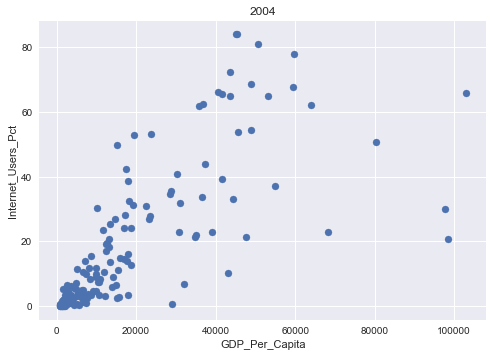

In [131]:
plt.scatter(gdp_and_internet_use_04.GDP_Per_Capita, gdp_and_internet_use_04.Internet_Users_Pct,)
plt.ylabel("Internet_Users_Pct")
plt.xlabel("GDP_Per_Capita")
_ = plt.title("2004") # this removes some of the descriptive info that appears on the top 


Text(0.5, 0, 'GDP_Per_Capita')

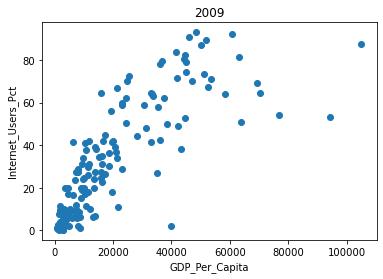

In [86]:
plt.scatter(gdp_and_internet_use_09.GDP_Per_Capita, gdp_and_internet_use_09.Internet_Users_Pct)
plt.title("2009")
plt.ylabel("Internet_Users_Pct")
plt.xlabel("GDP_Per_Capita")

Text(0.5, 0, 'GDP_Per_Capita')

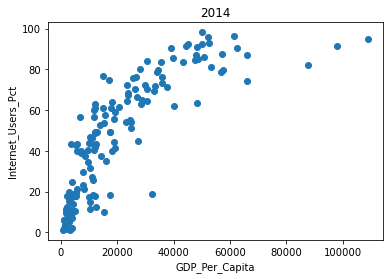

In [87]:
plt.scatter(gdp_and_internet_use_14.GDP_Per_Capita, gdp_and_internet_use_14.Internet_Users_Pct)
plt.title("2014")
plt.ylabel("Internet_Users_Pct")
plt.xlabel("GDP_Per_Capita")

QUESTION 24 answer: It looks like Internet became more accessible over time to countries with lower GDP per capita.  It also shows that countries with little-to-no GDP per capita were the slowest to reach higher internet user percentages (and some are still without).

Q25: Look at the distribution of gdp per capita values for 2014. Is it unimodal?

    A: No, this is not a unimodal distribution because there is not a distinct, single peak

Q26: Look at the distribution of Internet Use for 2014. Is it unimodal?

    A: No

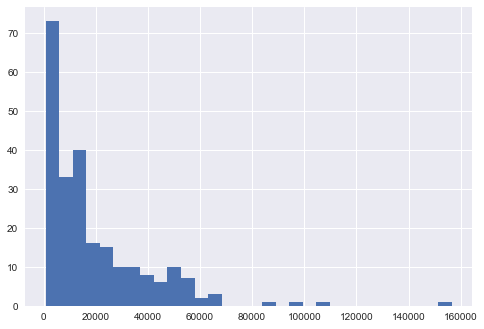

In [134]:
_ = plt.hist(gdp_and_internet_use_14.GDP_Per_Capita, bins=30)

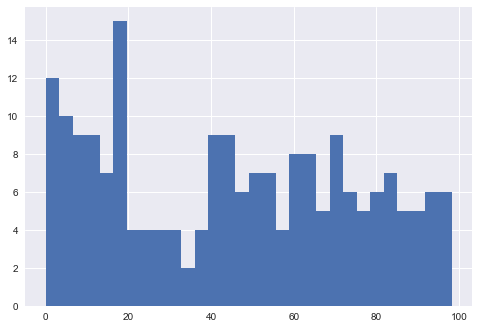

In [135]:
_ = plt.hist(gdp_and_internet_use_14.Internet_Users_Pct, bins=30)

Q27:What are the top 5 countries in terms of internet use in 2014?

In [99]:
sort_14 = gdp_and_internet_use_14.sort_values('Internet_Users_Pct', ascending=False)
top_5_14=sort_14.head(5)

In [101]:
print(top_5_14)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2507  Iceland  2014    49911.069825               98.16
6651  Bermuda  2014             NaN               96.80
4461   Norway  2014    61308.763730               96.30
1374  Denmark  2014    52172.606425               95.99
6611  Andorra  2014             NaN               95.90


In [103]:
filtered_years.head(10)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2014,2249.253738,6.390000
9,Afghanistan,2009,1881.777626,3.550000
14,Afghanistan,2004,1284.127338,0.105809
21,Albania,2014,11828.232264,60.100000
26,Albania,2009,10528.778102,41.200000
31,Albania,2004,7738.542836,2.420388
50,Algeria,2014,11329.428688,18.090000
55,Algeria,2009,10610.711405,11.230000
60,Algeria,2004,9898.310490,4.634475
79,Angola,2014,8239.832077,21.260000


In [112]:
top_5_internet=(filtered_years.loc[filtered_years['Country'].isin(['Iceland', 'Bermuda','Norway','Denmark','Andorra'])])
    #Alternative:

In [106]:
top_5_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 1374 to 6661
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             15 non-null     object 
 1   Year                15 non-null     object 
 2   GDP_Per_Capita      9 non-null      float64
 3   Internet_Users_Pct  15 non-null     float64
dtypes: float64(2), object(2)
memory usage: 600.0+ bytes


TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

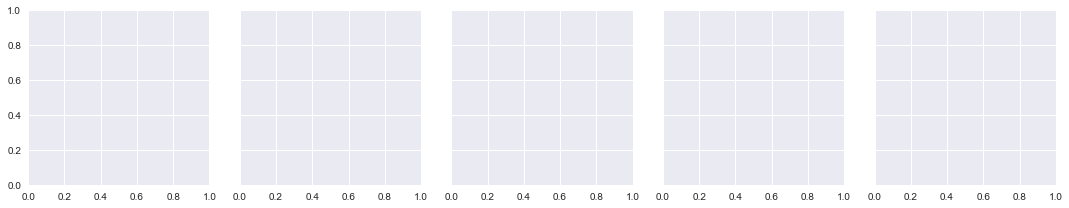

In [140]:
plt.style.use('seaborn')
#year=sns.load_dataset

g=sns.FacetGrid(top_5_internet.sort_values('Country', axis=0), col="Country")
g.map(plt.bar)

In [ ]:
#Joshua answer:
sns.set(style='darkgrid', color_codes=True)
g = sns.FacetGrid(top_5_internet, col = 'Year', height = 5, hue = "Country")
g.map(plt.bar, "Country", "Internet_Users_Pct")